# Markov Chain Monte Carlo (MCMC)

<!-- ![img](http://www.mathematik.uni-ulm.de/stochastik/lehre/ss06/markov/skript_engl/bild4.jpg) -->

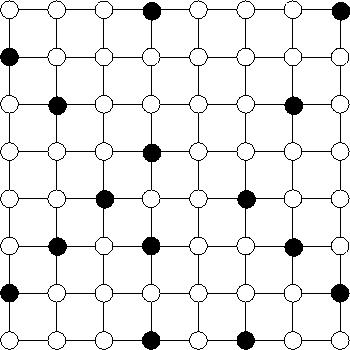

Как оценить, сколько в среднем закрашенных вершин будет иметь такой граф?

Сформулируем задачу в математических терминах.

Пусть $\xi \in \{0,1\}^{V}$ обозначает конфигурацию графа (расстановку 0 и 1 по вершинам). Назовем конфигурацию допустимой, если вершины, соединенные ребрами, не имеют одновременно значения 1. Пусть $Z_G$ - общее количество допустимых конфигураций. Зададим  распределение на множестве всех конфигураций:
$$\begin{equation*}
\mu(\xi) = 
 \begin{cases}
   \frac{1}{Z_G}, &\text{$\xi$ - допустимая конфигурация}\\
   0, &\text{иначе.}
 \end{cases}
\end{equation*}$$
Обозначим $n(\xi)$ - число закрашенных вершин в конфигурации $\xi$. Тогда
$$
{\rm E} n(\xi) = \sum\limits_{x \in \{0,1\}^V} n(x) \mu(x) = \frac{1}{Z_G} \sum\limits_{x \in \{0,1\}^V} n(x) {\rm I}_{\{x - \text{допустимая} \}}
$$

Явно перебирать все $x \in \{0,1\}^{V}$ не представляется возможным. Мы могли бы попробовать оценить ${\rm E} n(\xi)$, используя закон больших чилел:
$$
{\rm E} n(\xi) \approx \frac{1}{N} \sum\limits_{i=1}^{N} n(\xi), \text{где $\xi \sim \mu$}
$$
Но есть проблема: как смоделировать случайную величину из распределения $\mu$?

В этом нам поможет метод MCMC.

## Задание

* Оценить  ${\rm E} n(\xi)$ с помощью МСМС для графа 8х8
* Обосновать численно и графически стационарность
* Построить график распределеиня $n(\xi)$
* Изобразить раскраску для одного из случайных графов, взятых из стационарного распределения.
* Дополнительная: построить график зависимости ${\rm E} n(\xi)$ от N - размера графа (NxN). Что можно сказать о скорости роста ${\rm E} n(\xi)$ как функции от N?

## Литература

*  http://probability.ca/jeff/ftpdir/johannes.pdf
* http://nitro.biosci.arizona.edu/courses/EEB596/handouts/Gibbs.pdf


Оценка с помощью МСМС

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
def step(M, N):
  x, y = np.random.randint(N), np.random.randint(N)
  if(M[x, y] == 1):
    M[x, y] = 0
  else:
    if(M[max(x - 1, 0), y] == M[min(x + 1, N - 1), y] == 0 and
       M[x, max(y - 1, 0)] == M[x, min(y + 1, N - 1)] == 0):
      M[x, y] = 1
  return M
M = np.zeros((8, 8))
random_walk = []
for i in range(10 ** 4): 
  M = step(M, 8)
  random_walk += [M.sum()]
print(np.mean(random_walk))

15.2396


Стационарность

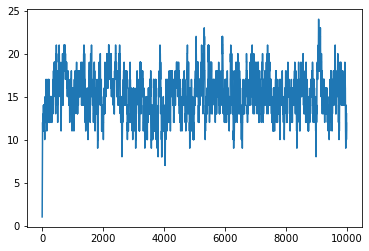

In [2]:
plt.plot(random_walk)

In [3]:
def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

g_test(random_walk[100:])

Ttest_indResult(statistic=3.473119683540021, pvalue=0.000529787293333926)

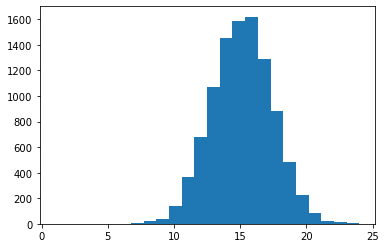

In [4]:
plt.hist(random_walk, bins = int(np.max(random_walk)))
plt.show()

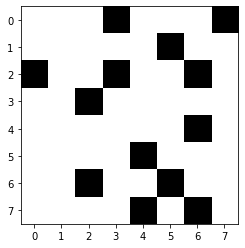

In [5]:
plt.imshow(M, cmap = 'binary')
ax = plt.gca()
ax.set_xticks(np.arange(0, 8, 1))
ax.set_yticks(np.arange(0, 8, 1))
plt.show()

E(3) = 2.3636
E(4) = 4.0218
E(5) = 6.1435
E(6) = 8.8247
E(7) = 11.5002
E(8) = 15.205
E(9) = 19.1374
E(10) = 23.165
E(11) = 27.9746
E(12) = 33.6085
E(13) = 40.5221
E(14) = 46.8454
E(15) = 52.3686
E(16) = 58.7448
E(17) = 66.7582
E(18) = 72.7362
E(19) = 83.3127
E(20) = 93.6475
E(21) = 100.3239
E(22) = 109.4365
E(23) = 121.0411
E(24) = 130.0434
E(25) = 140.199
E(26) = 151.6701
E(27) = 161.7919
E(28) = 179.9362
E(29) = 187.1147
E(30) = 201.3379


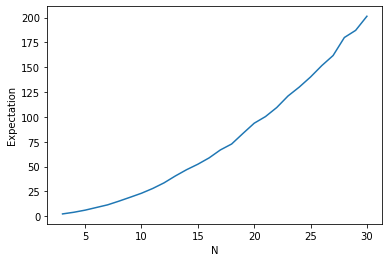

In [6]:
E = []
for N in range(3, 31):
    random_walk = []
    M = np.zeros((N, N))
    for i in range(10 ** 4): 
      M = step(M, N)
      random_walk += [M.sum()]
    E += [np.mean(random_walk)]
    print('E(%d) =' % (N), E[-1])
    
plt.plot(np.arange(3, 31), E)
plt.xlabel('N')
plt.ylabel('Expectation')
plt.show()